In [2]:
import sys
sys.path = ['/Users/sebastian/github/mlxtend/'] + sys.path

In [3]:
#load watermark
%load_ext watermark
%watermark -a 'Gopala KR' -u -d -v -p watermark,numpy,pandas,matplotlib,nltk,sklearn,tensorflow,theano,mxnet,chainer,seaborn,keras,tflearn,bokeh,gensim

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Gopala KR 
last updated: 2018-02-13 

CPython 3.6.3
IPython 6.2.1

watermark 1.6.0
numpy 1.13.1
pandas 0.20.3
matplotlib 2.0.2
nltk 3.2.5
sklearn 0.19.0
tensorflow 1.3.0
theano 1.0.1
mxnet 1.0.0
chainer 3.3.0
seaborn 0.8.1
keras 2.1.3
tflearn n
bokeh 0.12.14
gensim 3.3.0


# Artificial Neurons and Single-Layer Neural Networks

## - How Machine Learning Algorithms Work Part 1

<br>
<br>

**This article offers a brief glimpse of the history and basic concepts of machine learning. We will take a look at the first algorithmically described neural network and the gradient descent algorithm in context of adaptive linear neurons, which will not only introduce the principles of machine learning but also serve as the basis for modern multilayer neural networks in future articles.**

## Sections

- [Introduction](#Introduction)
- [Artificial Neurons and the McCulloch-Pitts Model](#Artificial-Neurons-and-the-McCulloch-Pitts-Model)
- [Frank Rosenblatt's Perceptron](#Frank-Rosenblatt's-Perceptron)
    - [The Unit Step Function](#The-Unit-Step-Function)
    - [The Perceptron Learning Rule](#The-Perceptron-Learning-Rule)
    - [Implementing the Perceptron Rule in Python](#Implementing-the-Perceptron-Rule-in-Python)
    - [Problems with Perceptrons](#Problems-with-Perceptrons)
- [Adaptive Linear Neurons and the Delta Rule](#Adaptive-Linear-Neurons-and-the-Delta-Rule)
    - [Gradient Descent](#Gradient-Descent)
    - [The Gradient Descent Rule in Action](#The-Gradient-Descent-Rule-in-Action)
    - [Online Learning via Stochastic Gradient Descent](#Online-Learning-via-Stochastic-Gradient-Descent)
- [What's Next?](#What's-Next?)
- [References](#References)

<br>
<br>

# Introduction

[[back to top](#Sections)]

Machine learning is one of the hottest and most exciting fields in the modern age of technology. Thanks to machine learning, we enjoy robust email spam filters, convenient text and voice recognition, reliable web search engines, challenging chess players, and, hopefully soon, safe and efficient self-driving cars. 

Without any doubt, machine learning has become a big and popular field, and sometimes it may be challenging to see the (random) forest for the (decision) trees. Thus, I thought that it might be worthwhile to explore different machine learning algorithms in more detail by not only discussing the theory but also by implementing them step by step.

To briefly summarize what machine learning is all about: "[Machine learning is the] field of study that gives computers the ability to learn without being explicitly programmed" (Arthur Samuel, 1959). Machine learning is about the development and use of algorithms that can recognize patterns in data in order to make decisions based on statistics, probability theory, combinatorics, and optimization.




The first article in this series will introduce perceptrons and the adaline (ADAptive LINear NEuron), which fall into the category of single-layer neural networks. The perceptron is not only the first algorithmically described learning algorithm [[1](#References)], but it is also very intuitive, easy to implement, and a good entry point to the (re-discovered) modern state-of-the-art machine learning algorithms: Artificial neural networks (or "deep learning" if you like). As we will see later, the adaline is a consequent improvement of the perceptron algorithm and offers a good opportunity to learn about a popular optimization algorithm in machine learning: gradient descent.

<br>
<br>

# Artificial Neurons and the McCulloch-Pitts Model

[[back to top](#Sections)]

The initial idea of the perceptron dates back to the work of Warren McCulloch and Walter Pitts in 1943 [[2](#References)], who drew an analogy between biological neurons and simple logic gates with binary outputs. In more intuitive terms, neurons can be understood as the subunits of a neural network in a biological brain. Here, the signals of variable magnitudes arrive at the dendrites. Those input signals are then accumulated in the cell body of the neuron, and if the accumulated signal exceeds a certain threshold, a output signal is generated that which will be passed on by the axon.


<img src='./images/perceptron_neuron.png' alt=''>

<br>
<br>

# Frank Rosenblatt's Perceptron

[[back to top](#Sections)]

To continue with the story, a few years after McCulloch and Walter Pitt, Frank Rosenblatt published the first concept of the Perceptron learning rule [[1](#References)]. The main idea was to define an algorithm in order to learn the values of the weights $w$ that are then multiplied with the input features in order to make a decision whether a neuron fires or not. In context of pattern classification, such an algorithm could be useful to determine if a sample belongs to one class or the other. 



<img src='./images/perceptron_binary.png' alt=''>

To put the perceptron algorithm into the broader context of machine learning: The perceptron belongs to the category of supervised learning algorithms, single-layer binary linear classifiers to be more specific. In brief, the task is to predict to which of two possible categories a certain data point belongs based on a set of input variables. In this article, I don't want to discuss the concept of predictive modeling and classification in too much detail, but if you prefer more background information, please see my previous article "[Introduction to supervised learning](http://sebastianraschka.com/Articles/2014_intro_supervised_learning.html)".

<br>
<br>

## The Unit Step Function

[[back to top](#Sections)]

Before we dive deeper into the algorithm(s) for learning the weights of the artificial neuron, let us take a brief look at the basic notation. In the following sections, we will label the *positive* and *negative* class in our binary classification setting as "1" and "-1", respectively. Next, we define an activation function $g(\mathbf{z})$ that takes a linear combination of the input values $\mathbf{x}$ and weights $\mathbf{w}$ as input ($\mathbf{z} = w_1x_{1} + \dots + w_mx_{m}$), and if $g(\mathbf{z})$ is greater than a defined threshold $\theta$ we predict 1 and -1 otherwise; in this case, this activation function $g$ is an alternative form of a simple "unit step function," which is sometimes also called "Heaviside step function." 

*(Please note that the *unit step* is classically defined as being equal to 0 if $ z < 0$ and 1 for $z \ge 0$; nonetheless, we will refer to the following piece-wise linear function with -1 if $z < \theta$ and 1 for $z \ge \theta$ as *unit step function* for simplicity).*

$$
 g(\mathbf{z}) =\begin{cases}
    1 & \text{if $\mathbf{z} \ge \theta$}\\
    -1 & \text{otherwise}.
  \end{cases}
$$


where

$$\mathbf{z} =  w_1x_{1} + \dots + w_mx_{m} = \sum_{j=1}^{m} x_{j}w_{j} \\ = \mathbf{w}^T\mathbf{x}$$

$\mathbf{w}$ is the feature vector, and $\mathbf{x}$ is an $m$-dimensional sample from the training dataset:

$$ 
\mathbf{w} = \begin{bmatrix}
    w_{1}  \\
    \vdots \\
    w_{m}
\end{bmatrix}
\quad  \mathbf{x} = \begin{bmatrix}
    x_{1}  \\
    \vdots \\
    x_{m}
\end{bmatrix}$$

<img src='./images/perceptron_unit_step.png' alt=''>

In order to simplify the notation, we bring $\theta$ to the left side of the equation and define $w_0 = -\theta  \text{ and } x_0=1$ 

so that 

$$\begin{equation}
 g({\mathbf{z}}) =\begin{cases}
    1 & \text{if $\mathbf{z} \ge 0$}\\
    -1 & \text{otherwise}.
  \end{cases}
\end{equation}$$

and


$$\mathbf{z} = w_0x_{0} + w_1x_{1} + \dots + w_mx_{m} = \sum_{j=0}^{m} x_{j}w_{j} \\ = \mathbf{w}^T\mathbf{x}.$$




<br>
<br>

## The Perceptron Learning Rule

[[back to top](#Sections)]

It might sound like extreme case of a reductionist approach, but the idea behind this "thresholded" perceptron was to mimic how a single neuron in the brain works: It either "fires" or not. To summarize the main points from the previous section: A perceptron receives multiple input signals, and if the sum of the input signals exceed a certain threshold it either returns a signal or  remains "silent" otherwise. What made this a "machine learning" algorithm was Frank Rosenblatt's idea of the perceptron learning rule: The perceptron algorithm is about learning the weights for the input signals in order to draw linear decision boundary that allows us to discriminate between the two linearly separable classes +1 and -1.




<img src='./images/perceptron_schematic.png' alt=''>

Rosenblatt's initial perceptron rule is fairly simple and can be summarized by the following steps: 

1. Initialize the weights to 0 or small random numbers.
2. For each training sample $\mathbf{x^{(i)}}$:
    2. Calculate the *output* value.
    2. Update the weights.

The output value is the class label predicted by the unit step function that we defined earlier (output $=g(\mathbf{z})$) and the weight update can be written more formally as  $w_j := w_j + \Delta w_j$.

The value for updating the weights at each increment is calculated by the learning rule

$\Delta w_j = \eta \; (\text{target}^{(i)} - \text{output}^{(i)})\;x^{(i)}_{j}$

where $\eta$ is the learning rate (a constant between 0.0 and 1.0), "target" is the true class label, and the "output" is the predicted class label.

It is important to note that all weights in the weight vector are being updated simultaneously. Concretely, for a 2-dimensional dataset, we would write the update as:

$\Delta w_0 = \eta(\text{target}^{(i)} - \text{output}^{(i)})$  
$\Delta w_1 = \eta(\text{target}^{(i)} - \text{output}^{(i)})\;x^{(i)}_{1}$  
$\Delta w_2 = \eta(\text{target}^{(i)} - \text{output}^{(i)})\;x^{(i)}_{2}$  

Before we implement the perceptron rule in Python, let us make a simple thought experiment to illustrate how beautifully simple this learning rule really is. In the two scenarios where the perceptron predicts the class label correctly, the weights remain unchanged:

- $\Delta w_j = \eta(-1^{(i)} - -1^{(i)})\;x^{(i)}_{j} = 0$ 
- $\Delta w_j = \eta(1^{(i)} - 1^{(i)})\;x^{(i)}_{j} = 0$ 

However, in case of a wrong prediction, the weights are being "pushed" towards the direction of the positive or negative target class, respectively:

- $\Delta w_j = \eta(1^{(i)} - -1^{(i)})\;x^{(i)}_{j} = \eta(2)\;x^{(i)}_{j}$ 
- $\Delta w_j = \eta(-1^{(i)} - 1^{(i)})\;x^{(i)}_{j} = \eta(-2)\;x^{(i)}_{j}$ 



It is important to note that the convergence of the perceptron is only guaranteed if the two classes are linearly separable. If the two classes can't be separated by a linear decision boundary, we can set a maximum number of passes over the training dataset ("epochs") and/or a threshold for the number of tolerated misclassifications.

<br>
<br>

## Implementing the Perceptron Rule in Python

[[back to top](#Sections)]

In this section, we will implement the simple perceptron learning rule in Python to classify flowers in the Iris dataset.
Please note that I omitted some "safety checks" for clarity, for a more "robust" version please see the following [code on GitHub](https://github.com/rasbt/mlxtend/blob/master/mlxtend/classifier/perceptron.py).

In [4]:
import numpy as np

class Perceptron(object):
    
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

For the following example, we will load the Iris data set from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/) and only focus on the two flower species *Setosa* and *Versicolor*. Furthermore, we will only use the two features *sepal length* and *petal length* for visualization purposes.

In [5]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

In [7]:
!pip install mlxtend

    100% |████████████████████████████████| 1.3MB 927kB/s ta 0:00:01


Weights: [-0.4  -0.68  1.82]


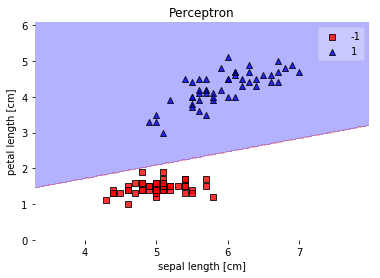

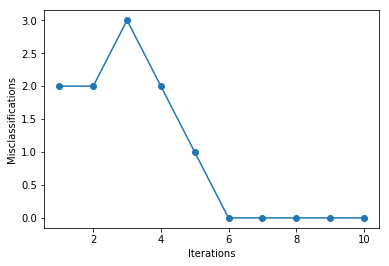

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

ppn = Perceptron(epochs=10, eta=0.1)

ppn.train(X, y)
print('Weights: %s' % ppn.w_)
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()


As we can see, the perceptron converges after the 6th iteration and separates the two flower classes perfectly.

<br>
<br>

## Problems with Perceptrons

[[back to top](#Sections)]

Although the perceptron classified the two Iris flower classes perfectly, convergence is one of the biggest problems of the perceptron. Frank Rosenblatt proofed mathematically that the perceptron learning rule converges if the two classes can be separated by linear hyperplane, but problems arise if the classes cannot be separated perfectly by a linear classifier. To demonstrate this issue, we will use two different classes and features from the Iris dataset.

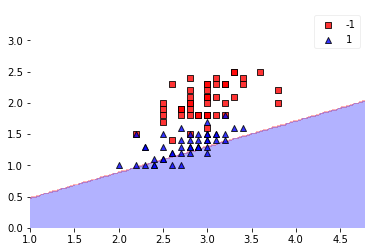

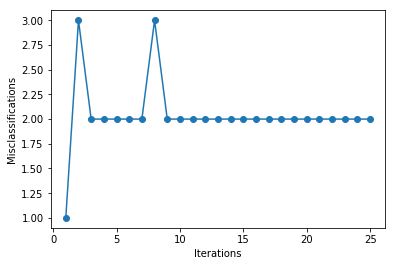

In [9]:
# versicolor and virginica
y2 = df.iloc[50:150, 4].values
y2 = np.where(y2 == 'Iris-virginica', -1, 1)

# sepal width and petal width
X2 = df.iloc[50:150, [1,3]].values

ppn = Perceptron(epochs=25, eta=0.01)
ppn.train(X2, y2)

plot_decision_regions(X2, y2, clf=ppn)
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

In [10]:
print('Total number of misclassifications: %d of 100' % (y2 != ppn.predict(X2)).sum())

Total number of misclassifications: 43 of 100


Even at a lower training rate, the perceptron failed to find a good decision boundary since one or more samples will always be misclassified in every epoch so that the learning rule never stops updating the weights.

It may seem paradoxical in this context that another shortcoming of the perceptron algorithm is that it stops updating the weights as soon as all samples are classified correctly. Our intuition tells us that a decision boundary with a large margin between the classes (as indicated by the dashed line in the figure below) likely has a better generalization error than the decision boundary of the perceptron. But large-margin classifiers such as Support Vector Machines are a topic for another time.

<img src='./images/perceptron_margin.png' alt=''>

<br>
<br>

# Adaptive Linear Neurons and the Delta Rule

[[back to top](#Sections)]

The perceptron surely was very popular at the time of its discovery, however, it only took a few years until Bernard Widrow and his doctoral student Tedd Hoff proposed the idea of the Adaptive Linear Neuron (adaline) [[3](#References)].

In contrast to the perceptron rule, the delta rule of the adaline (also known as Widrow-Hoff" rule or Adaline rule) updates the weights based on a linear activation function rather than a unit step function; here, this linear activation function $g(\mathbf{z})$ is just the identity function of the net input $g(\mathbf{w}^T\mathbf{x}) = \mathbf{w}^T\mathbf{x}$. In the next section, we will see why this linear activation is an improvement over the perceptron update and where the name "delta rule" comes from.

<img src='./images/perceptron_vs_adaline.png' alt=''>

<br>
<br>

## Gradient Descent

[[back to top](#Sections)]

Being a continuous function, one of the biggest advantages of the linear activation function over the unit step function is that it is differentiable. This property allows us to define a cost function $J(\mathbf{w})$ that we can minimize in order to update our weights. In the case of the linear activation function, we can define the cost function $J(\mathbf{w})$ as the *sum of squared errors* (SSE), which is similar to the cost function that is minimized in ordinary least squares (OLS) linear regression.

$$J(\mathbf{w})  = \frac{1}{2} \sum_{i} (\text{target}^{(i)} - \text{output}^{(i)})^2 \quad \quad \text{output}^{(i)} \in \mathbb{R}$$

(The fraction $\frac{1}{2}$ is just used for convenience to derive the gradient as we will see in the next paragraphs.)

In order to minimize the SSE cost function, we will use gradient descent, a simple yet useful optimization algorithm that is often used in machine learning to find the local minimum of linear systems.

Before we get to the fun part (calculus), let us consider a convex cost function for one single weight. As illustrated in the figure below, we can describe the principle behind gradient descent as "climbing down a hill" until a local or global minimum is reached. At each step, we take a step into the opposite direction of the gradient, and the step size is determined by the value of the learning rate as well as the slope of the gradient.

<img src='./images/perceptron_gradient_descent_1.png' alt=''>

Now, as promised, onto the fun part -- deriving the Adaline learning rule.
As mentioned above, each update is updated by taking a step into the opposite direction of the gradient $\Delta \mathbf{w} = - \eta \nabla J(\mathbf{w})$, thus, we have to compute the partial derivative of the cost function for each weight in the weight vector:  $\Delta w_j = - \eta \frac{\partial J}{\partial w_j}$. 




The partial derivative of the SSE cost function for a particular weight can be calculated as follows:

$$\begin{equation}
 \frac{\partial J}{\partial w_j} = \frac{\partial }{\partial w_j} \frac{1}{2} \sum_i  (t^{(i)} - o^{(i)})^2 \\
= \frac{1}{2} \sum_i \frac{\partial}{\partial w_j} (t^{(i)} - o^{(i)})^2 \\
= \frac{1}{2} \sum_i 2 (t^{(i)} - o^{(i)}) \frac{\partial}{\partial w_j} (t^{(i)} - o^{(i)}) \\
=  \sum_i (t^{(i)} - o^{(i)}) \frac{\partial}{\partial w_j} \bigg(t^{(i)} - \sum_j w_j x^{(i)}_{j}\bigg) \\
= \sum_i  (t^{(i)} - o^{(i)})(-x^{(i)}_{j}) 
\end{equation}$$

(t = target, o = output)

And if we plug the results back into the learning rule, we get

$\Delta w_j = - \eta \frac{\partial J}{\partial w_j} = - \eta \sum_i  (t^{(i)} - o^{(i)})(- x^{(i)}_{j}) = \eta \sum_i (t^{(i)} - o^{(i)})x^{(i)}_{j}$,

Eventually, we can apply a simultaneous weight update similar to the perceptron rule: 

$\mathbf{w} := \mathbf{w} + \Delta \mathbf{w}$.

**Although, the learning rule above looks identical to the perceptron rule, we shall note the two main differences:**

1. Here, the output "o" is a real number and not a class label as in the perceptron learning rule.
2. The weight update is calculated based on all samples in the training set (instead of updating the weights incrementally after each sample), which is why this approach is also called "batch" gradient descent.

<br>
<br>

## The Gradient Descent Rule in Action

[[back to top](#Sections)]

Now, it's time to implement the gradient descent rule in Python.

In [11]:
import numpy as np

class AdalineGD(object):
    
    def __init__(self, eta=0.01, epochs=50): 
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

In practice, it often requires some experimentation to find a good learning rate for optimal convergence, thus, we will start by plotting the cost for two different learning rates.

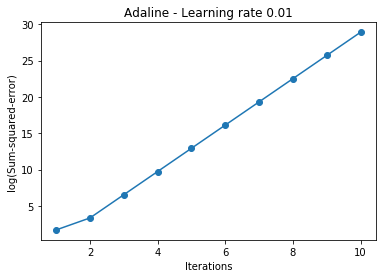

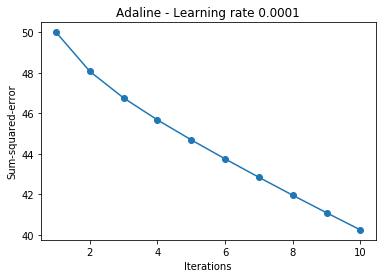

In [12]:
ada = AdalineGD(epochs=10, eta=0.01).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaline - Learning rate 0.01')
plt.show()

ada = AdalineGD(epochs=10, eta=0.0001).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.0001')
plt.show()

The two plots above nicely emphasize the importance of plotting learning curves by illustrating two most common problems with gradient descent:

1. If the learning rate is too large, gradient descent will overshoot the minima and diverge.
2. If the learning rate is too small, the algorithm will require too many epochs to converge and can become trapped in local minima more easily.



<img src='./images/perceptron_learning_rate.png' alt=''>

Gradient descent is also a good example why feature scaling is important for many machine learning algorithms. 
It is not only easier to find an appropriate learning rate if the features are on the same scale, but it also often leads to faster convergence and can prevent the weights from becoming too small (numerical stability).

A common way of feature scaling is standardization

$$\mathbf{x}_{j, std} = \frac{\mathbf{x}_j - \mathbf{\mu}_j}{\mathbf{\sigma}_j}$$

where $\mathbf{\mu}_j$ is the sample mean of the feature $\mathbf{x}_{j}$ and $\mathbf{\sigma}_j$ the standard deviation, respectively. After standardization, the features will have unit variance and are centered around mean zero. 

In [13]:
# standardize features
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.evaluate import plot_decision_regions

ada = AdalineGD(epochs=15, eta=0.01)

ada.train(X_std, y)
plot_decision_regions(X_std, y, clf=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.show()

plt.plot(range(1, len( ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.show()

ImportError: cannot import name 'plot_decision_regions'

<img src='./images/perceptron_animation.gif' alt=''>

<br>
<br>

## Online Learning via Stochastic Gradient Descent

[[back to top](#Sections)]

The previous section was all about "batch" gradient descent learning. The "batch" updates refers to the fact that the cost function is minimized based on the complete training data set. If we think back to the perceptron rule, we remember that it performed the weight update incrementally after each individual training sample. This approach is also called "online" learning, and in fact, this is also how Adaline was first described by Bernard Widrow et al. [[3](#References)]

The process of incrementally updating the weights is also called "stochastic" gradient descent since it approximates the minimization of the cost function. Although the stochastic gradient descent approach might sound inferior to gradient descent due its "stochastic" nature and the "approximated" direction (gradient), it can have certain advantages in practice. Often, stochastic gradient descent converges much faster than gradient descent since the updates are applied immediately after each training sample; stochastic gradient descent is computationally more efficient, especially for very large datasets. Another advantage of online learning is that the classifier can be immediately updated as new training data arrives, e.g., in web applications, and old training data can be discarded if storage is an issue. In large-scale machine learning systems, it is also common practice to use so-called "mini-batches", a compromise with smoother convergence than stochastic gradient descent.

In the interests of completeness let us also implement the stochastic gradient descent Adaline and confirm that it converges on the linearly separable iris dataset.

In [15]:
import numpy as np

class AdalineSGD(object):
    
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y, reinitialize_weights=True):

        if reinitialize_weights:
            self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            for xi, target in zip(X, y):
                output = self.net_input(xi)
                error = (target - output)
                self.w_[1:] += self.eta * xi.dot(error)
                self.w_[0] += self.eta * error
            
            cost = ((y - self.activation(X))**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

One more advice before we let the adaline learn via stochastic gradient descent is to shuffle the training dataset to iterate over the training samples in random order. 

We shall note that the "standard" stochastic gradient descent algorithm uses sampling "with replacement," which means that at each iteration, a training sample is chosen randomly from the entire training set. In contrast, sampling "without replacement," which means that each training sample is evaluated exactly once in every epoch, is not only easier to implement but also shows a better performance in empirical comparisons. A more detailed discussion about this topic can be found in Benjamin Recht and Christopher Re's paper *Beneath the valley of the noncommutative arithmetic-geometric mean inequality: conjectures, case-studies, and consequences* [[4](#References)].


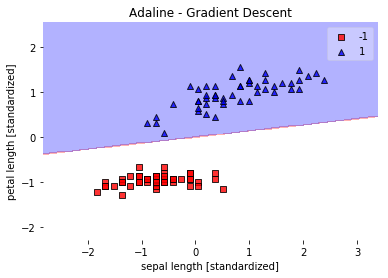

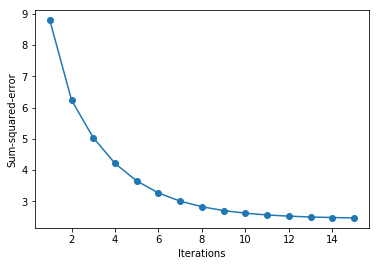

In [16]:
ada = AdalineSGD(epochs=15, eta=0.01)

# shuffle data
np.random.seed(123)
idx = np.random.permutation(len(y))
X_shuffled, y_shuffled =  X_std[idx], y[idx]

# train and adaline and plot decision regions
ada.train(X_shuffled, y_shuffled)
plot_decision_regions(X_shuffled, y_shuffled, clf=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.show()

<br>
<br>

# What's Next?

[[back to top](#Sections)]

Although we covered many different topics during this article, we just scratched the surface of artificial neurons. 

In later articles, we will take a look at different approaches to dynamically adjust the learning rate, the concepts of "One-vs-All" and "One-vs-One" for multi-class classification, regularization to overcome overfitting by introducing additional information, dealing with nonlinear problems and multilayer neural networks, different activation functions for artificial neurons, and related concepts such as logistic regression and support vector machines.



<img src='./images/perceptron_activation.png' alt=''>

<br>
<br>

### References

[[back to top](#Sections)]

[1] F. Rosenblatt. The perceptron, a perceiving and recognizing automaton Project Para. Cornell Aeronautical Laboratory, 1957.

[2] W. S. McCulloch and W. Pitts. A logical calculus of the ideas immanent in nervous activity. The bulletin of mathematical biophysics, 5(4):115–133, 1943.

[3] B. Widrow et al. Adaptive ”Adaline” neuron using chemical ”memistors”. Number Technical Report 1553-2. Stanford Electron. Labs., Stanford, CA, October 1960.

[4] B. Recht and C. R ́e. Beneath the valley of the noncommutative arithmetic-geometric mean inequality: conjectures, case-studies, and consequences. arXiv preprint arXiv:1202.4184, 2012.


In [ ]:
tested; gopal